<a href="https://colab.research.google.com/github/SuperDuck1892/A.I_HomeWork/blob/main/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU

from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split

In [ ]:
train="/content/drive/MyDrive/Flower/Train"
test="/content/drive/MyDrive/Flower/Test"

In [ ]:
Data1 = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Data2= ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
data_train = Data1.flow_from_directory(train, target_size=(150,150),batch_size=32, class_mode='categorical')
data_test  = Data2.flow_from_directory(test, target_size=(150,150),batch_size=32, class_mode='categorical')
data_train.class_indices


Found 150 images belonging to 5 classes.
Found 150 images belonging to 5 classes.


{'APRICOT': 0, 'DAISY': 1, 'LOTUS': 2, 'ROSE': 3, 'WATERLILY': 4}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train=model.fit(data_train,batch_size=128,epochs=20,verbose=1)
test_loss,test_acc = model.evaluate(data_test,verbose=0)
print('Do mat mat:',test_loss)
print('Do chinh xac:',test_acc)

Epoch 1/20
5/5 [==============================] - 10s 2s/step - loss: 16.6630 - accuracy: 0.1933
Epoch 2/20
5/5 [==============================] - 11s 2s/step - loss: 3.1524 - accuracy: 0.2800
Epoch 3/20
5/5 [==============================] - 8s 2s/step - loss: 1.3171 - accuracy: 0.4467
Epoch 4/20
5/5 [==============================] - 11s 2s/step - loss: 0.9543 - accuracy: 0.6800
Epoch 5/20
5/5 [==============================] - 8s 2s/step - loss: 0.8065 - accuracy: 0.6400
Epoch 6/20
5/5 [==============================] - 9s 2s/step - loss: 0.7004 - accuracy: 0.7467
Epoch 7/20
5/5 [==============================] - 11s 2s/step - loss: 0.5287 - accuracy: 0.8333
Epoch 8/20
5/5 [==============================] - 9s 2s/step - loss: 0.4666 - accuracy: 0.8467
Epoch 9/20
5/5 [==============================] - 10s 2s/step - loss: 0.3341 - accuracy: 0.8800
Epoch 10/20
5/5 [==============================] - 9s 2s/step - loss: 0.3076 - accuracy: 0.9067
Epoch 11/20
5/5 [==========================

In [ ]:
model.save('/content/drive/MyDrive/SaveFlower')

<ipython-input-11-d65c35ba4084>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='orange')


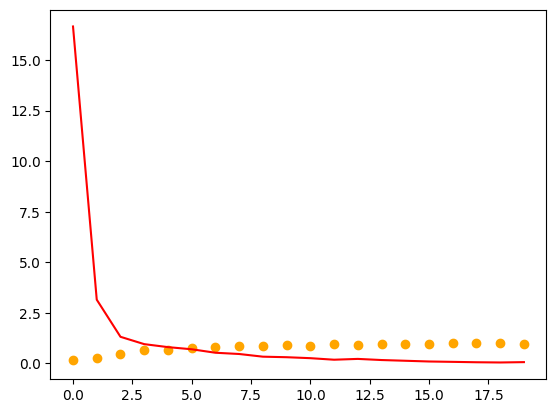

In [ ]:
accuracy =train.history['accuracy']
loss = train.history['loss']
epochs=range(len(accuracy))

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='orange')
plt.plot(epochs,loss , 'r', label ='Training loss')
plt.show()

In [ ]:
from keras.models import load_model
# load model save
model_flowers = load_model('/content/drive/MyDrive/SaveFlower')
     

1/1 [==============================] - 0s 38ms/step
HOA NÀY LÀ : APRICOT


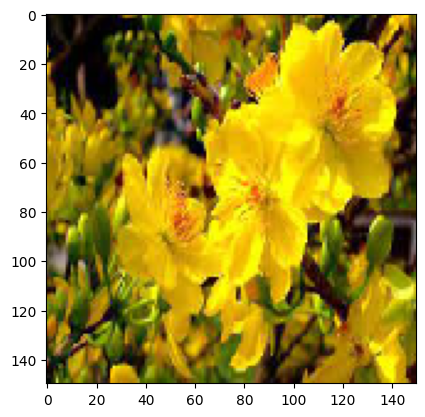

1/1 [==============================] - 0s 54ms/step
HOA NÀY LÀ : DAISY


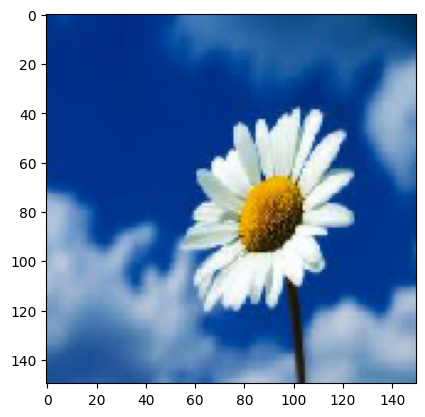

1/1 [==============================] - 0s 55ms/step
HOA NÀY LÀ : ROSE


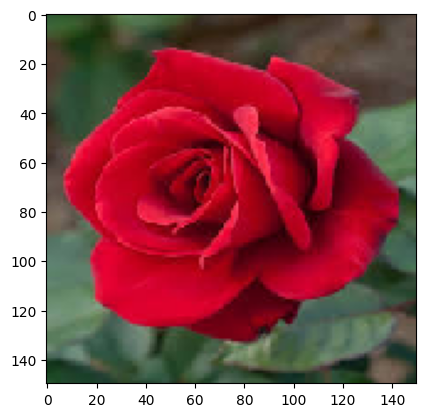

1/1 [==============================] - 0s 56ms/step
HOA NÀY LÀ : LOTUS


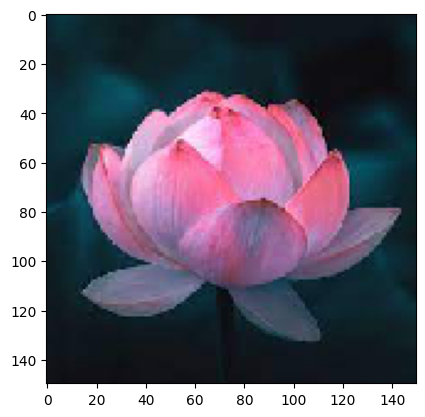

1/1 [==============================] - 0s 58ms/step
HOA NÀY LÀ : WATER LILY


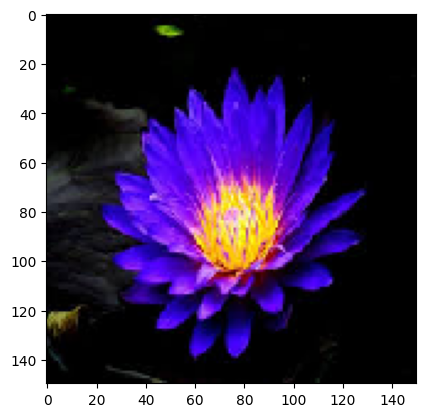

In [ ]:
from keras.utils import np_utils, to_categorical, load_img, img_to_array
folder='/content/drive/MyDrive/Test_Flower/'
for i in os.listdir(folder):
  img = load_img(folder+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_flowers.predict(img).argmax())
  class_name=['APRICOT', 'DAISY', 'LOTUS', 'ROSE', 'WATER LILY']
  print('HOA NÀY LÀ : {}'.format(class_name[result]))
  plt.show()